In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

import statsmodels.api as sm

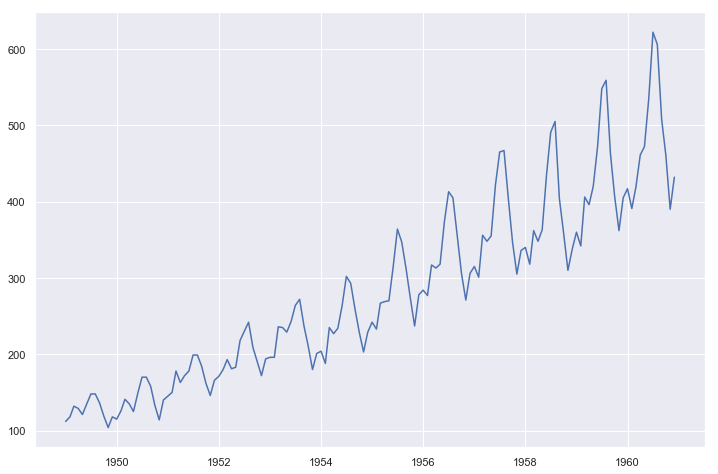

In [2]:
data1 = pd.read_csv('AirPassengers.csv', 
                   index_col='ds', 
                   parse_dates=True, 
                   dtype='float')

ts1 = data1['y'] 

plt.figure(figsize=(12,8))
plt.plot(ts1)

/Users/ryosukeokubo/.pyenv/versions/3.6.6/envs/tensorflow/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


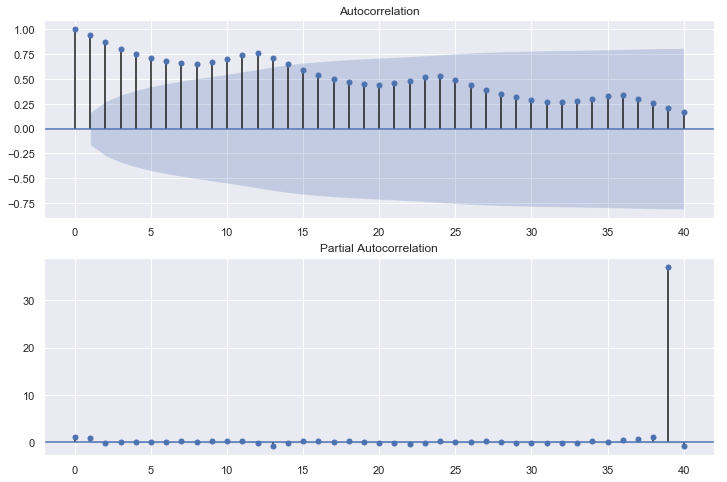

In [3]:
#コレログラム
ts_acf1 = sm.tsa.stattools.acf(ts1, nlags=40)

ts_pacf1 = sm.tsa.stattools.pacf(ts1, nlags=40, method='ols')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1, lags=40, ax=ax2)

In [4]:
#log変換（自然対数）
logts = np.log(data1['y'])
logts.head()

ds
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: y, dtype: float64

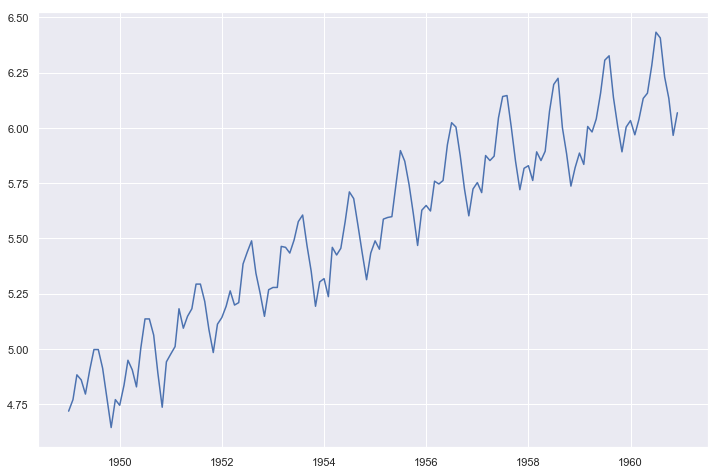

In [5]:
plt.figure(figsize=(12,8))
plt.plot(logts)

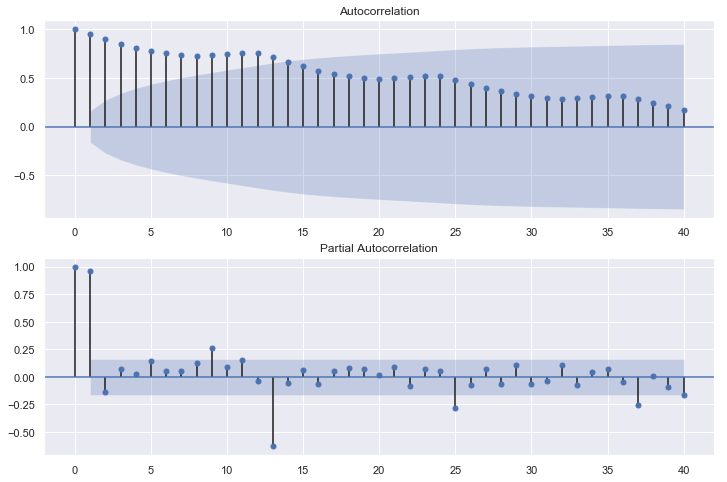

In [6]:
#コレログラム
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(logts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(logts, lags=40, ax=ax2)

In [7]:
#差分変換
diffts = ts1 - ts1.shift()
diffts = diffts.dropna()
diffts.head()

ds
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: y, dtype: float64

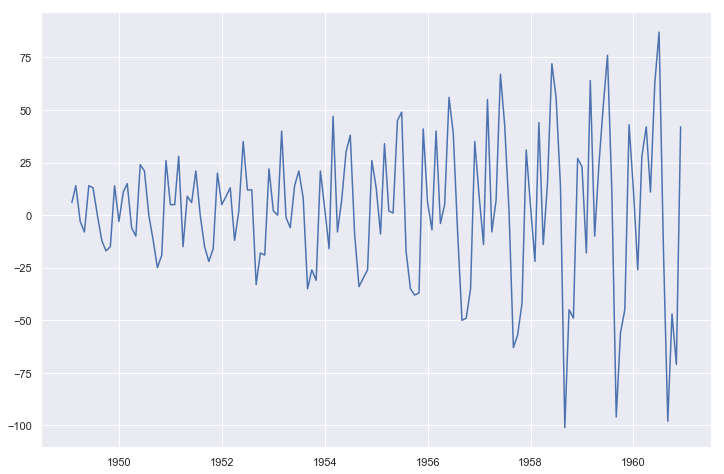

In [8]:
plt.figure(figsize=(12,8))
plt.plot(diffts)

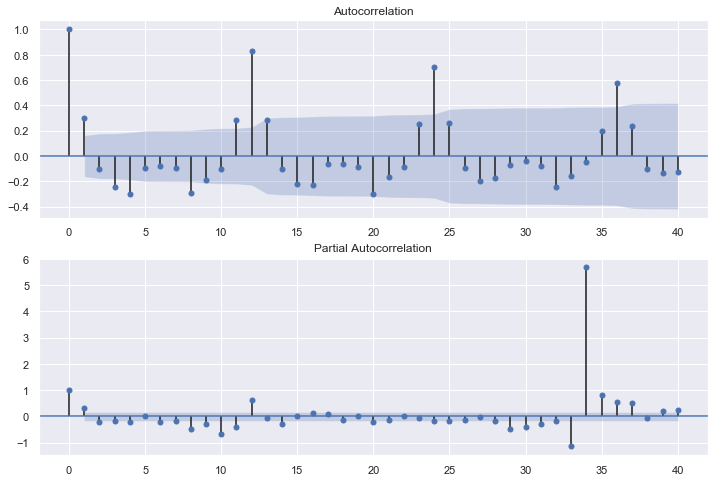

In [9]:
#コレログラム
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diffts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diffts, lags=40, ax=ax2)

In [10]:
#対数差分変換
logdiffts = np.log(ts1) - np.log(ts1.shift())
logdiffts = logdiffts.dropna()
logdiffts.head()

ds
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: y, dtype: float64

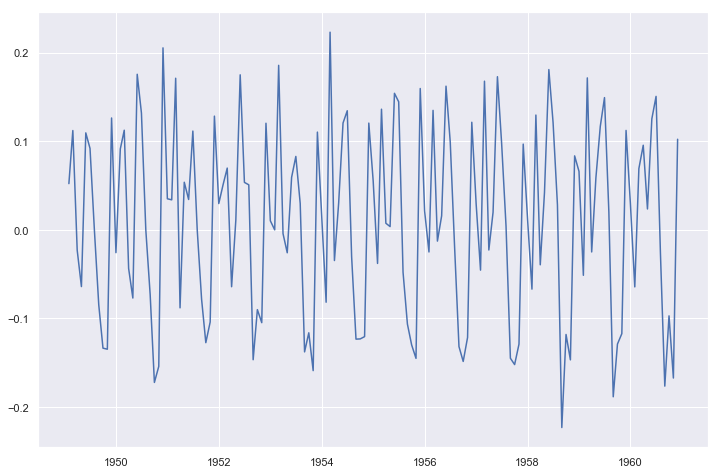

In [11]:
plt.figure(figsize=(12,8))
plt.plot(logdiffts)

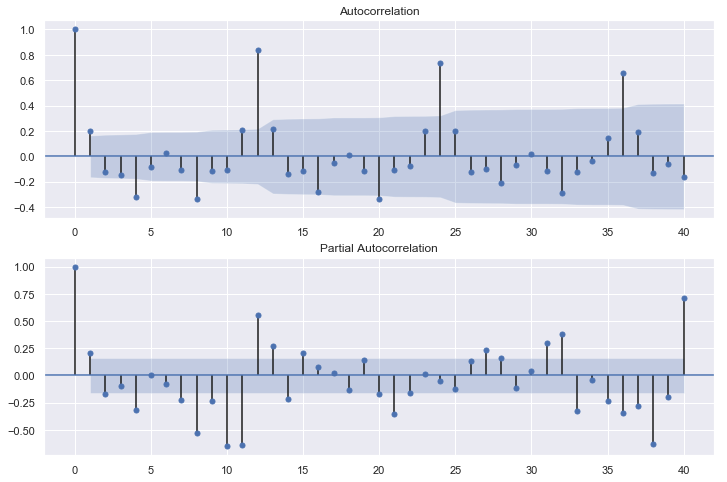

In [12]:
#コレログラム
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(logdiffts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(logdiffts, lags=40, ax=ax2)